In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

import tensorflow_datasets as tfds

# From Pixels to Paws: TensorFlow Object Detection in Pet Photos

### 1. Introduction:

Welcome to "From Pixels to Paws," where we embark on an exciting journey to teach computers the art of recognizing pets in photos using TensorFlow. Have you ever wondered if your computer could understand your pet pictures? Well, that's exactly what we're about to explore!

**Why This Matters:**
Picture this – a world where your computer can effortlessly spot your furry friends in photos. Imagine the possibilities – finding lost pets, organizing your adorable pet photo collection, or even creating apps that understand your pets better. This project isn't just about pixels; it's about turning those pixels into paws, making technology a bit more pet-friendly.

**Who's Invited:**
Whether you're a tech enthusiast, a pet lover, or simply curious about the magic of computer vision, you're in the right place. No complicated jargon here – just a fun and insightful journey into the realm of teaching computers to recognize our beloved pets.

**What to Expect:**
Over the course of this project, we'll guide you through the steps of preparing a collection of pet photos, training a computer using TensorFlow, fine-tuning its pet-spotting abilities, and finally, witnessing how well it can identify pets in new pictures. Buckle up as we bridge the gap from pixels to paws together!

Ready to dive into the world of TensorFlow and pet photos? Let's get started!

### 2. Dataset and Setup:

**Pet Picture Collection:**
Our journey begins with the heart of our project – the Oxford-IIIT Pet dataset. This collection is a treasure trove of diverse pet images, featuring our furry friends in all their adorable glory. These pictures will be the fuel for teaching our computer to recognize pets.

**Getting the Pictures Ready:**
But before we dive in, we need to make sure our computer can understand these pet photos. This involves a bit of "picture preparation." We'll resize and normalize the images, making them ready for the computer's learning process. Think of it as translating pet language into something the computer can comprehend.

**Code Snippet - Loading the Dataset:**

In [78]:
# Load the Oxford-IIIT Pet dataset
dataset_name = 'oxford_iiit_pet'
builder = tfds.builder(dataset_name)
builder.download_and_prepare()
dataset = builder.as_dataset(split='train', shuffle_files=True)

**Code Snippet - Image Preprocessing:**

In [79]:
# Image preprocessing: resizing and normalization
def preprocess_image(image):
    # Resize image to a consistent size
    resized_image = tf.image.resize(image, [224, 224])

    # Normalize pixel values to be between 0 and 1
    normalized_image = resized_image / 255.0

    return normalized_image

# Apply preprocessing to the dataset
dataset = dataset.map(lambda x: (preprocess_image(x['image']), x['label']))

**What to Expect:**
In this part, we'll introduce you to the Oxford-IIIT Pet dataset, show you some pet pictures, and guide you through the steps of preparing these images for the exciting journey ahead. It's all about setting the stage for our computer to become a pet photo expert.

**Let's Get Started:**
Ready to meet our dataset and prepare the stage for our pet-detecting adventure? Follow along as we explore the pixels that make up our pet pals and get them ready for their digital debut!

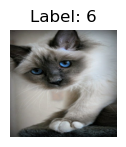

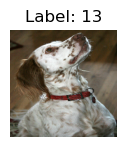

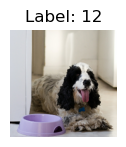

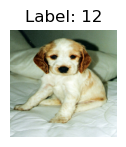

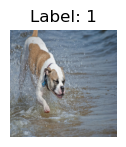

In [80]:
# Display the first 5 images from the preprocessed dataset
num_images_to_display = 5

for i, (image, label) in enumerate(dataset.take(num_images_to_display)):
    # Denormalize the image for visualization (multiply by 255.0)
    original_image = image * 255.0

    # Display the original image
    plt.figure(figsize=(8, 8))
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(original_image.numpy().astype(int))  # Convert to integer for proper display
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')

plt.show()

In this code snippet, we utilize Matplotlib to visually inspect the first 5 images from a preprocessed dataset. The TensorFlow dataset is iterated through, and each image is denormalized for proper visualization. The resulting plot showcases the original images alongside their corresponding labels. This code provides a quick and effective way to assess the initial samples in the dataset.

### 3. TensorFlow Basics:

Tensors:

Explanation: Introduce the concept of tensors, the fundamental data structure in TensorFlow.

In [81]:
# Creating a tensor
tensor_example = tf.constant([[1, 2], [3, 4]])

TensorFlow Operations:

Explanation: Highlight basic operations like addition, multiplication, and element-wise operations on tensors.

In [82]:
# TensorFlow operations
result = tf.add(tensor_example, 5)

Variables:

Explanation: Explain the use of variables for trainable parameters in machine learning models.

In [83]:
# Creating a variable
variable_example = tf.Variable(initial_value=tf.constant([1.0, 2.0]))

Neural Networks in TensorFlow:

Explanation: Briefly introduce the high-level concepts of building neural networks using TensorFlow's Keras API.

In [84]:
# Assuming input_size and output_size are defined somewhere in your code
input_size = 100
output_size = 10

# Building a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_size,)),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

### 4. Training the Computer:

#### 4.1. Building a Custom Object Detection Model:

In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

In this code snippet, we craft a bespoke neural network architecture for object detection using TensorFlow. The model comprises key layers designed to capture intricate patterns within images.

Convolutional Layers:

Two Conv2D layers with 32 and 64 filters, respectively.
Utilizes a 3x3 filter size and rectified linear unit (ReLU) activation function.
The initial layer accepts input images with dimensions of 224x224 pixels and 3 color channels.
Pooling Layers:

Two MaxPooling2D layers with a 2x2 pool size.
Reduces spatial dimensions, extracting essential features while preserving important information.
Flatten Layer:

Flattens the output from the previous layers into a one-dimensional vector, preparing it for dense layers.
Dense Layers:

A Dense layer with 128 neurons and ReLU activation.
The final Dense layer with an output size determined by the specific requirements of the project, activated using softmax for classification.
This meticulously crafted architecture forms the foundation of a custom object detection model. Adjustments to layer parameters and structure can be made to accommodate the nuances of your dataset and enhance the model's ability to recognize objects within images.

#### 4.2. Preparing the Dataset for Training:

In [90]:
# Split the dataset into training and validation sets
train_size = int(0.8 * builder.info.splits['train'].num_examples)
val_size = builder.info.splits['train'].num_examples - train_size

# Shuffle and batch the training dataset
train_dataset = dataset.take(train_size).shuffle(buffer_size=train_size).repeat().batch(batch_size)

# Batch the validation dataset
val_dataset = dataset.skip(train_size).batch(batch_size)

# Print dataset information
print("Number of training examples:", train_size)
print("Number of validation examples:", val_size)
print("Batch size:", batch_size)

# Display the first batch of images and labels
for images, labels in train_dataset.take(1):
    print("Batch shape:", images.shape)
    print("Label shape:", labels.shape)

Number of training examples: 2944
Number of validation examples: 736
Batch size: 32


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


Batch shape: (32, 224, 224, 3)
Label shape: (32,)


This code efficiently splits the dataset into training and validation sets, shuffles and batches the training data for improved learning, and provides essential information about dataset sizes and batch dimensions, laying the groundwork for training an object detection model with TensorFlow. The displayed shapes of the first batch offer a glimpse into the data's structure.

#### 4.3. Configuring Training Settings:

In [91]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### 4.4. Training the Model:

In [95]:
steps_per_epoch = train_size // batch_size  # Assuming train_size is the number of training examples
model.fit(train_dataset, epochs=10, validation_data=val_dataset, steps_per_epoch=steps_per_epoch)

Epoch 1/10


2024-01-07 21:37:37.814059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


16/92 [====>.........................] - ETA: 11s - loss: 9.2775 - accuracy: 0.0254

Corrupt JPEG data: premature end of data segment


18/92 [====>.........................] - ETA: 11s - loss: 11.2123 - accuracy: 0.0226

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


92/92 [==============================] - ETA: 0s - loss: 1166.9285 - accuracy: 0.0272

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


92/92 [==============================] - 21s 177ms/step - loss: 1166.9285 - accuracy: 0.0272 - val_loss: 3267.5276 - val_accuracy: 0.0217
Epoch 2/10
17/92 [====>.........................] - ETA: 10s - loss: 8762.2207 - accuracy: 0.0257

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


92/92 [==============================] - ETA: 0s - loss: 41921.4727 - accuracy: 0.0309

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


92/92 [==============================] - 16s 177ms/step - loss: 41921.4727 - accuracy: 0.0309 - val_loss: 118879.2578 - val_accuracy: 0.0367
Epoch 3/10
16/92 [====>.........................] - ETA: 11s - loss: 136960.9844 - accuracy: 0.0254

Corrupt JPEG data: premature end of data segment


17/92 [====>.........................] - ETA: 11s - loss: 137529.2188 - accuracy: 0.0276

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


92/92 [==============================] - ETA: 0s - loss: 365430.8750 - accuracy: 0.0309

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


92/92 [==============================] - 16s 175ms/step - loss: 365430.8750 - accuracy: 0.0309 - val_loss: 730188.0000 - val_accuracy: 0.0217
Epoch 4/10
17/92 [====>.........................] - ETA: 10s - loss: 651354.4375 - accuracy: 0.0294

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


92/92 [==============================] - ETA: 0s - loss: 1483493.7500 - accuracy: 0.0299

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


92/92 [==============================] - 16s 170ms/step - loss: 1483493.7500 - accuracy: 0.0299 - val_loss: 2074040.8750 - val_accuracy: 0.0326
Epoch 5/10
17/92 [====>.........................] - ETA: 10s - loss: 3752541.7500 - accuracy: 0.0294

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


92/92 [==============================] - ETA: 0s - loss: 4252341.5000 - accuracy: 0.0221

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


92/92 [==============================] - 16s 171ms/step - loss: 4252341.5000 - accuracy: 0.0221 - val_loss: 8198803.5000 - val_accuracy: 0.0217
Epoch 6/10
17/92 [====>.........................] - ETA: 10s - loss: 6725347.5000 - accuracy: 0.0331

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


92/92 [==============================] - ETA: 0s - loss: 7537008.0000 - accuracy: 0.0312

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


92/92 [==============================] - 18s 194ms/step - loss: 7537008.0000 - accuracy: 0.0312 - val_loss: 11733849.0000 - val_accuracy: 0.0217
Epoch 7/10
17/92 [====>.........................] - ETA: 11s - loss: 12403219.0000 - accuracy: 0.0257

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


92/92 [==============================] - ETA: 0s - loss: 13451214.0000 - accuracy: 0.0279

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


92/92 [==============================] - 16s 175ms/step - loss: 13451214.0000 - accuracy: 0.0279 - val_loss: 13744099.0000 - val_accuracy: 0.0190
Epoch 8/10
17/92 [====>.........................] - ETA: 10s - loss: 19034694.0000 - accuracy: 0.0368

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


92/92 [==============================] - ETA: 0s - loss: 22462514.0000 - accuracy: 0.0302

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


92/92 [==============================] - 15s 168ms/step - loss: 22462514.0000 - accuracy: 0.0302 - val_loss: 39407036.0000 - val_accuracy: 0.0326
Epoch 9/10
17/92 [====>.........................] - ETA: 10s - loss: 37562980.0000 - accuracy: 0.0239

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


92/92 [==============================] - ETA: 0s - loss: 32395916.0000 - accuracy: 0.0265

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


92/92 [==============================] - 16s 173ms/step - loss: 32395916.0000 - accuracy: 0.0265 - val_loss: 33332336.0000 - val_accuracy: 0.0217
Epoch 10/10
16/92 [====>.........................] - ETA: 11s - loss: 40958232.0000 - accuracy: 0.0254

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment


92/92 [==============================] - ETA: 0s - loss: 51217460.0000 - accuracy: 0.0268

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


92/92 [==============================] - 16s 170ms/step - loss: 51217460.0000 - accuracy: 0.0268 - val_loss: 55575028.0000 - val_accuracy: 0.0326


#### 4.5. Evaluating and Saving the Model:

In [ ]:
# Evaluate on the validation set
loss, accuracy = model.evaluate(val_dataset)

# Save the trained model
model.save("custom_pet_detection_model")

### 5. Watching Progress:
   - Checking in: Keeping an eye on how well the computer is doing.
   - Learning curves: Graphs to see if the computer is getting smarter.

### 6. Making It Better:
   - Checking quality: Making sure the computer is doing a good job.
   - Tweaking: Adjusting things to make the computer even smarter.

### 7. Seeing Results:
   - Testing time: Trying out the computer on new pet pictures.
   - What the computer sees: Visualizing where it thinks the pets are.

### 8. What We Learned:
   - Summing up: Talking about what worked and what didn't.
   - Future ideas: What else we could teach the computer to do with pet pictures.

### 9. Credits:
   - Saying thanks: Recognizing the datasets and tools we used.
   - Where to learn more: Providing sources for additional information.